In [36]:
import librosa
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy import signal
from scipy.fftpack import rfft
from scipy.signal import hamming
from scipy.fftpack import rfft

In [37]:
file_wave_path = "/home/cuong/XLTN/WAV/Xe.wav"

In [38]:
signalw, fs = librosa.load(file_wave_path, sr=None)
#signal: ma tran doc vao
#fs: tan so lay mau

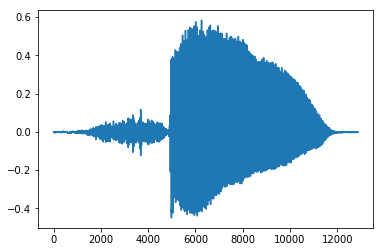

In [39]:
plt.plot(signalw)

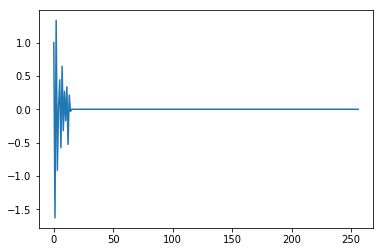

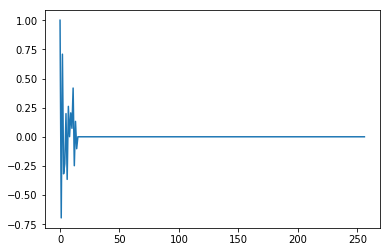

In [52]:
nfft = 256
data = signalw[6000:6256] #256 mau
A = [1.0]
B = [1.0, -0.95]
data_filter = signal.lfilter(B, A, data, axis=-1, zi=None)

w_hamming = hamming(nfft)
data_hamming = data * w_hamming
data_hamming_filter = data_filter * w_hamming
p = 14
a = librosa.lpc(data_hamming, p)
a = np.append(a, np.zeros(256-p))
aa = librosa.lpc(data_hamming_filter, p)
aa = np.append(aa, np.zeros(256-p))
#plt.plot(data)
plt.figure(0)
plt.plot(a)
plt.figure(1)
plt.plot(aa)

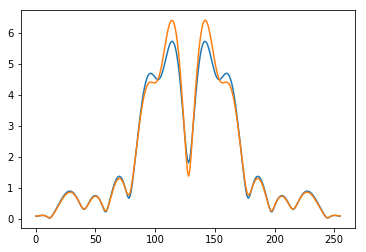

In [53]:
data_freq_hamming = np.fft.fft(a, 256)
data_freq_hamming_filter = np.fft.fft(aa, 256)
#plt.plot(data_freq)
magEnvelope_hamming = np.abs(data_freq_hamming)
magEnvelope_hamming_filter = np.abs(data_freq_hamming_filter)
plt.plot(magEnvelope)
plt.plot(magEnvelope_hamming)
#magDb = -20.0*np.log10(magEnvelope/max(magEnvelope))
#plt.subplot(312)

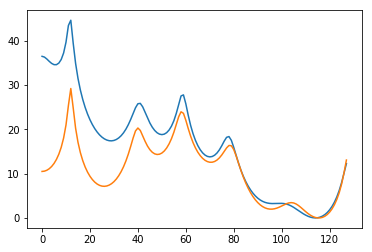

In [56]:
#ve dap ung bien do tuyen am
magDb = -20.0*np.log10(magEnvelope_hamming/max(magEnvelope_hamming))
magDb_hamming_filter = -20.0*np.log10(magEnvelope_hamming_filter/max(magEnvelope_hamming_filter))
#plt.figure(0)
plt.plot(magDb[0:128])
#plt.figure(1)
plt.plot(magDb_hamming_filter[0:128])
plt.show()

In [55]:
#so sánh đáp ứng biên độ tuyến âm có lọc hiệu chỉnh và không có lọc hiệu chỉnh
#hệ số hiệu chỉnh đang đặt là 0.95, đặt lại lớn hơn 0.95
#A = [1.0]
#B = [1.0, -0.95]
#data = signal.lfilter(B, A, data, axis = -1, zi = None)
#Bộ lọc hiệu chỉnh thực chất là lọc thông cao

In [57]:
import librosa as lb

In [59]:
signalw, fs = lb.load(file_wave_path, sr=None)

In [60]:
lb.lpc(data, 14)

array([ 1.        , -1.6078478 ,  1.2866573 , -0.8653783 , -0.02014857,
        0.46411306, -0.56577873,  0.581163  , -0.18779407,  0.10484745,
       -0.01592524,  0.2584287 , -0.512679  ,  0.20091252, -0.03048171],
      dtype=float32)